In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from ydata_profiling import ProfileReport
import prince

In [2]:
ahs = pd.read_csv('ahs2023_cleaned.csv')

In [3]:
ahs.head(3).T

0  \
DIVISION                  New England   
TENURE                            NaN   
YRBUILT                          1980   
UNITSIZE   2,500 to 2,999 square feet   
HSHLDTYPE                         NaN   
HHRACE                            NaN   
HHSEX                             NaN   
HINCP                             NaN   
TOTHCAMT                          NaN   
MARKETVAL                         NaN   
MAINTAMT                          NaN   
FUSEBLOW                          NaN   
SEWBREAK                          NaN   
ROACH                             NaN   
RODENT                            NaN   
NOWIRE                      Concealed   
PLUGS                      Not broken   
COLD                              NaN   
NOTOIL                            NaN   
NOWAT                             NaN   
FLOORHOLE                      Broken   
FNDCRUMB                       Broken   
PAINTPEEL                      Broken   
ROOFHOLE                       Broken   
ROOFSAG                        Broken   
ROOFSHIN                       Broken   
WALLCRACK                      Broken   
WALLSIDE                       Broken   
WALLSLOPE                      Broken   
WINBOARD                       Broken   
WINBROKE                       Broken   
LEAKI                             NaN   
MOLDBATH                          NaN   

                                                        1  \
DIVISION                               West South Central   
TENURE                                             Rented   
YRBUILT                                              1970   
UNITSIZE                                              NaN   
HSHLDTYPE                 Married-couple family household   
HHRACE                                         White only   
HHSEX                                                Male   
HINCP                                             48000.0   
TOTHCAMT                                           1093.0   
MARKETVAL                                             NaN   
MAINTAMT                                              NaN   
FUSEBLOW   No fuses / breakers blown in the last 3 months   
SEWBREAK               No breakdowns in the last 3 months   
ROACH              Seen a few times in the last 12 months   
RODENT                     No signs in the last 12 months   
NOWIRE                                          Concealed   
PLUGS                                          Not broken   
COLD                                               Broken   
NOTOIL                                             Broken   
NOWAT                                              Broken   
FLOORHOLE                                          Broken   
FNDCRUMB                                           Broken   
PAINTPEEL                                          Broken   
ROOFHOLE                                           Broken   
ROOFSAG                                            Broken   
ROOFSHIN                                           Broken   
WALLCRACK                                          Broken   
WALLSIDE                                           Broken   
WALLSLOPE                                          Broken   
WINBOARD                                           Broken   
WINBROKE                                       Not broken   
LEAKI                                              Broken   
MOLDBATH                                           Broken   

                                                           2  
DIVISION                                  West South Central  
TENURE     Owned or being bought by someone in your house...  
YRBUILT                                                 1970  
UNITSIZE                          2,000 to 2,499 square feet  
HSHLDTYPE                    Married-couple family household  
HHRACE                                            White only  
HHSEX                                                   Male  
HINCP                                               292500.0  

In [4]:
#ahs = ahs.select_dtypes(include=['object']).apply(lambda x: x.astype('category'))


In [5]:
profile = ProfileReport(ahs,
                        title = "2023 American Housing Survey",
                        html = {'style': {'full_width': True}},
                        minimal = False)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 33/33 [00:02<00:00, 11.63it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Using statistical hypothesis tests to gauge differences between renters and people who own their homes

In [6]:
ahs['TENURE'].value_counts()

TENURE
Owned or being bought by someone in your household    28192
Rented                                                19735
Occupied without payment of rent                        600
Name: count, dtype: int64

In [7]:
ahs['HINCP']

0             NaN
1         48000.0
2        292500.0
3         56000.0
4         36000.0
           ...   
55664     27000.0
55665         NaN
55666         NaN
55667         NaN
55668     86050.0
Name: HINCP, Length: 55669, dtype: float64

In [8]:
ahs.groupby('TENURE').agg({'HINCP': ['count', 'mean']})

HINCP               
                                                    count           mean
TENURE                                                                  
Occupied without payment of rent                      600   54319.523333
Owned or being bought by someone in your household  28192  134696.380746
Rented                                              19735   60886.215455

In [9]:
stats.f_oneway(ahs.query("TENURE == 'Owned or being bought by someone in your household'")['HINCP'],
               ahs.query("TENURE == 'Rented'")['HINCP'],
               ahs.query("TENURE == 'Occupied without payment of rent'")['HINCP'])

F_onewayResult(statistic=np.float64(1557.3251799219104), pvalue=np.float64(0.0))

In [10]:
ahs_corr = ahs[['MARKETVAL', 'YRBUILT']].dropna()
ahs_corr.corr()

MARKETVAL   YRBUILT
MARKETVAL   1.000000  0.035188
YRBUILT     0.035188  1.000000

In [11]:
stats.pearsonr(ahs_corr['MARKETVAL'], ahs_corr['YRBUILT'])

PearsonRResult(statistic=np.float64(0.03518752110020666), pvalue=np.float64(2.628878555092002e-10))

### Using a measurement model to build an index of how much each house/apartment is in disrepair (a "flophouse index")

In [12]:
brokenness = ahs[['FUSEBLOW',
       'SEWBREAK', 'ROACH', 'RODENT', 'NOWIRE', 'PLUGS', 'COLD', 'NOTOIL',
       'NOWAT', 'FLOORHOLE', 'FNDCRUMB', 'PAINTPEEL', 'ROOFHOLE', 'ROOFSAG',
       'ROOFSHIN', 'WALLCRACK', 'WALLSIDE', 'WALLSLOPE', 'WINBOARD',
       'WINBROKE', 'LEAKI', 'MOLDBATH']].dropna()
brokenness

FUSEBLOW  \
1      No fuses / breakers blown in the last 3 months   
2      No fuses / breakers blown in the last 3 months   
3      No fuses / breakers blown in the last 3 months   
6      No fuses / breakers blown in the last 3 months   
7      No fuses / breakers blown in the last 3 months   
...                                               ...   
55659  No fuses / breakers blown in the last 3 months   
55660  No fuses / breakers blown in the last 3 months   
55661  No fuses / breakers blown in the last 3 months   
55662  No fuses / breakers blown in the last 3 months   
55663  No fuses / breakers blown in the last 3 months   

                                 SEWBREAK  \
1      No breakdowns in the last 3 months   
2      No breakdowns in the last 3 months   
3      No breakdowns in the last 3 months   
6      No breakdowns in the last 3 months   
7      No breakdowns in the last 3 months   
...                                   ...   
55659  No breakdowns in the last 3 months   
55660  No breakdowns in the last 3 months   
55661  No breakdowns in the last 3 months   
55662  No breakdowns in the last 3 months   
55663  No breakdowns in the last 3 months   

                                        ROACH  \
1      Seen a few times in the last 12 months   
2              No signs in the last 12 months   
3              No signs in the last 12 months   
6              No signs in the last 12 months   
7              No signs in the last 12 months   
...                                       ...   
55659          No signs in the last 12 months   
55660          No signs in the last 12 months   
55661          No signs in the last 12 months   
55662          No signs in the last 12 months   
55663          No signs in the last 12 months   

                                       RODENT     NOWIRE       PLUGS    COLD  \
1              No signs in the last 12 months  Concealed  Not broken  Broken   
2              No signs in the last 12 months  Concealed  Not broken  Broken   
3      Seen a few times in the last 12 months  Concealed  Not broken  Broken   
6              No signs in the last 12 months    Exposed  Not broken  Broken   
7              No signs in the last 12 months  Concealed  Not broken  Broken   
...                                       ...        ...         ...     ...   
55659          No signs in the last 12 months  Concealed  Not broken  Broken   
55660          No signs in the last 12 months  Concealed  Not broken  Broken   
55661          No signs in the last 12 months  Concealed  Not broken  Broken   
55662          No signs in the last 12 months  Concealed  Not broken  Broken   
55663  Seen a few times in the last 12 months  Concealed  Not broken  Broken   

       NOTOIL   NOWAT FLOORHOLE  ... ROOFHOLE ROOFSAG ROOFSHIN WALLCRACK  \
1      Broken  Broken    Broken  ...   Broken  Broken   Broken    Broken   
2      Broken  Broken    Broken  ...   Broken  Broken   Broken    Broken   
3      Broken  Broken    Broken  ...   Broken  Broken   Broken    Broken   
6      Broken  Broken    Broken  ...   Broken  Broken   Broken    Broken   
7      Broken  Broken    Broken  ...   Broken  Broken   Broken    Broken   
...       ...     ...       ...  ...      ...     ...      ...       ...   
55659  Broken  Broken    Broken  ...   Broken  Broken   Broken    Broken   
55660  Broken  Broken    Broken  ...   Broken  Broken   Broken    Broken   
55661  Broken  Broken    Broken  ...   Broken  Broken   Broken    Broken   
55662  Broken  Broken    Broken  ...   Broken  Broken   Broken    Broken   
55663  Broken  Broken    Broken  ...   Broken  Broken   Broken    Broken   

      WALLSIDE WALLSLOPE WINBOARD    WINBROKE       LEAKI MOLDBATH  
1       Broken    Broken   Broken  Not broken      Broken   Broken  
2       Broken    Broken   Broken      Broken      Broken   Broken  
3       Broken    Broken   Broken      Broken  Not broken   Broken  
6       Broken    Broken   Broken      Broken      Broken   Broken  
7       Bro

In [13]:
MCA = prince.MCA(n_components=2)
MCA = MCA.fit(brokenness)

In [16]:
MCA.column_coordinates(brokenness).sort_values(0)

0         1
WALLCRACK__Broken                                  -0.110855 -0.001903
RODENT__No signs in the last 12 months             -0.109564 -0.025464
COLD__Broken                                       -0.093871 -0.053987
LEAKI__Broken                                      -0.088288 -0.088718
FNDCRUMB__Broken                                   -0.086900  0.025294
ROACH__No signs in the last 12 months              -0.084313 -0.027410
FUSEBLOW__No fuses / breakers blown in the last... -0.079577 -0.056147
WINBROKE__Broken                                   -0.079181  0.022157
ROOFSHIN__Broken                                   -0.076268  0.055554
WALLSIDE__Broken                                   -0.065975  0.027237
ROOFSAG__Broken                                    -0.056095  0.041172
PAINTPEEL__Broken                                  -0.056069 -0.001133
ROOFHOLE__Broken                                   -0.054311  0.034522
COLD__Not applicable                               -0.045999  0.642968
WALLSLOPE__Broken                                  -0.040679  0.023851
FLOORHOLE__Broken                                  -0.038398 -0.001178
WINBOARD__Broken                                   -0.035079  0.017436
MOLDBATH__Broken                                   -0.032659 -0.017258
NOTOIL__Broken                                     -0.030577 -0.058014
NOWAT__Broken                                      -0.030073 -0.046210
NOWIRE__Concealed                                  -0.026012 -0.016522
PLUGS__Not broken                                  -0.025373 -0.014594
SEWBREAK__No breakdowns in the last 3 months       -0.024025 -0.051753
ROACH__Seen a few times in the last 12 months       0.438162  0.208899
FUSEBLOW__1 fuse / breaker blown in the last 3 ...  0.541724  0.445818
RODENT__Seen a few times in the last 12 months      0.563501  0.134624
SEWBREAK__Sewage system broke down in the last ...  0.898746  3.031551
FUSEBLOW__2 fuses / breakers blown in the last ...  0.944360  0.679228
NOWIRE__Exposed                                     0.990650  0.629249
ROACH__Seen monthly in the last 12 months           1.026851 -0.408067
LEAKI__Not broken                                   1.123735  1.129206
COLD__Not broken                                    1.160762  0.471498
NOWAT__Not broken                                   1.252767  1.924961
RODENT__Seen monthly in the last 12 months          1.372739 -0.308791
FUSEBLOW__3 fuses / breakers blown in the last ...  1.409192  0.611686
ROACH__Seen weekly in the last 12 months            1.548473  0.360692
PLUGS__Broken                                       1.684151  0.968698
FNDCRUMB__Not broken                                1.745908 -0.508189
SEWBREAK__One breakdown in the last 3 months fo...  1.785576  4.505885
RODENT__Seen weekly in the last 12 months           1.857964  0.658554
WINBROKE__Not broken                                2.193651 -0.613843
FUSEBLOW__4 or more fuses / breakers blown in t...  2.200653  1.574857
WALLCRACK__Not broken                               2.256655  0.038741
ROOFSHIN__Not broken                                2.437838 -1.775728
SEWBREAK__Two breakdowns in the last 3 months f...  2.483047  4.534788
NOTOIL__Not broken                                  2.567718  4.871779
ROACH__Seen daily in the last 12 months             2.725398  1.529589
WALLSIDE__Not broken                                2.759534 -1.139231
RODENT__Seen daily in the last 12 months            3.222939  1.317553
PAINTPEEL__Not broken                               3.357478  0.067863
MOLDBATH__Not broken                                3.371285  1.781522
ROOFSAG__Not broken                                 3.431535 -2.518668
WINBOARD__Not broken                                3.506481 -1.742931
FLOORHOLE__Not broken                               3.664105  0.112455
WALLSLOPE__Not broken                               3.965744 -2.325183
ROOFHOLE__Not broken                                4.042030 -2.569242
SEWBREAK__Fo

In [17]:
broken_index = MCA.row_coordinates(brokenness).reset_index()

In [18]:
broken_index = broken_index.rename({0: 'house_condition',
                                    1: 'other_index'}, axis=1)
broken_index

index  house_condition  other_index
0          1         0.184207    -0.112983
1          2        -0.165798    -0.039286
2          3         0.070237     0.214797
3          6        -0.038500     0.079784
4          7        -0.165798    -0.039286
...      ...              ...          ...
32201  55659        -0.165798    -0.039286
32202  55660        -0.165798    -0.039286
32203  55661        -0.165798    -0.039286
32204  55662        -0.165798    -0.039286
32205  55663        -0.081522    -0.009769

[32206 rows x 3 columns]

In [20]:
ahs = ahs.reset_index()

In [22]:
ahs_broken = pd.merge(ahs, broken_index, 
                        on='index',
                        how = 'outer',
                        validate='one_to_one',
                        indicator='matched')


In [23]:
ahs_broken['matched'].value_counts()

matched
both          32206
left_only     23463
right_only        0
Name: count, dtype: int64

### The distributions of income, race, ownership, and housing expenses

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Distribution of Household Income')

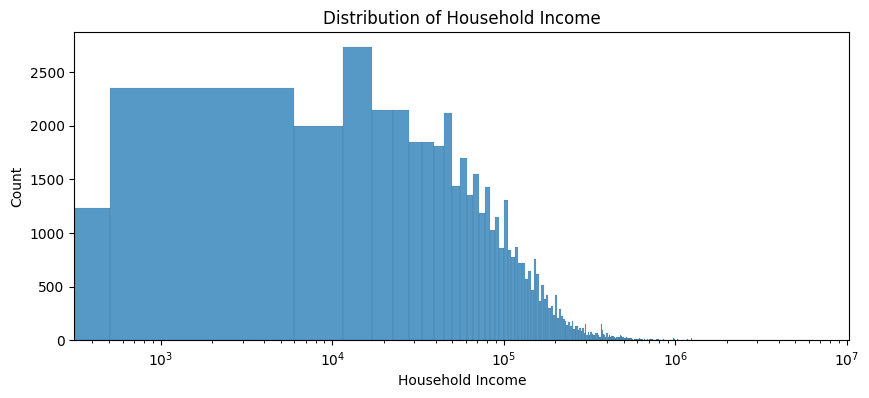

In [31]:
#ahs_broken['HINCP']
fig, ax = plt.subplots(figsize = (10,4))

sns.histplot(ahs_broken['HINCP'])
ax.set(xscale='log')
plt.xlabel('Household Income')
plt.title('Distribution of Household Income')

<Axes: xlabel='count', ylabel='TENURE'>

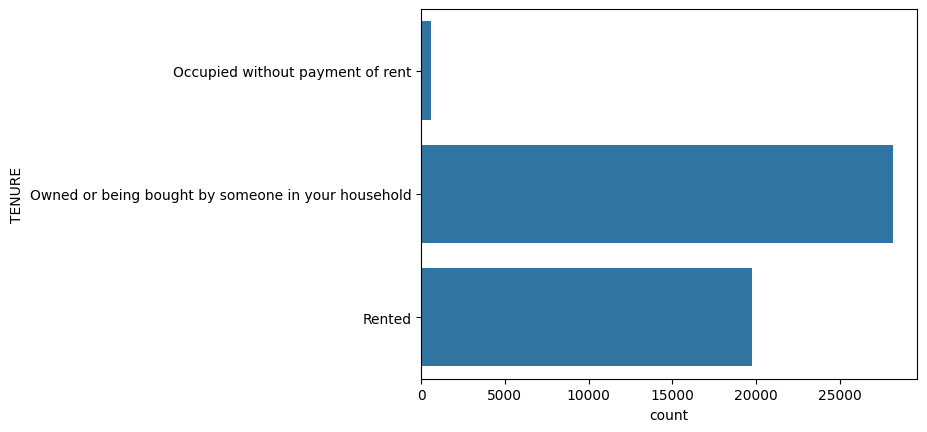

In [42]:
ahs_tenure = ahs.groupby('TENURE').size().reset_index()
ahs_tenure = ahs_tenure.rename(columns={0: 'count'})
sns.barplot(y='TENURE', x='count', data=ahs_tenure)

### The relationship between these four features with each other, as well as the two indices of home disrepair that we built last week

<Axes: xlabel='avg_income', ylabel='TENURE'>

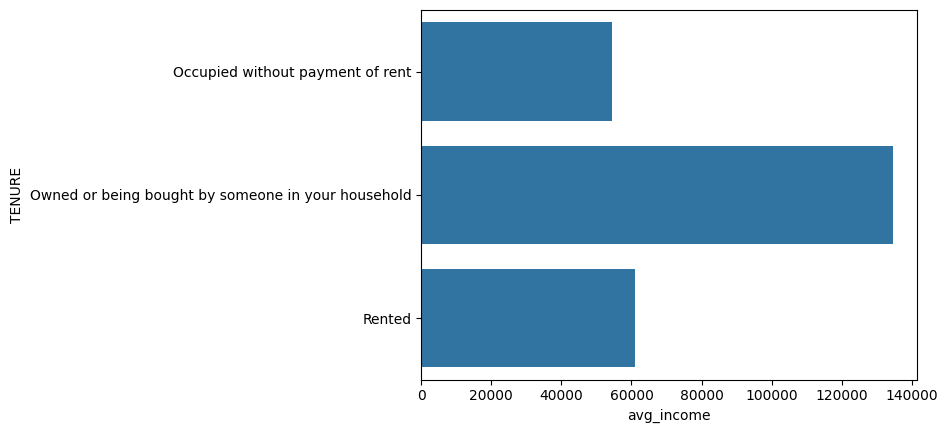

In [44]:
ahs_tenure = ahs.groupby('TENURE').agg({'HINCP': 'mean'}).reset_index()
ahs_tenure = ahs_tenure.rename({'HINCP': 'avg_income'}, axis=1)
sns.barplot(y='TENURE', x='avg_income', data=ahs_tenure)

<Axes: xlabel='house_condition', ylabel='MARKETVAL'>

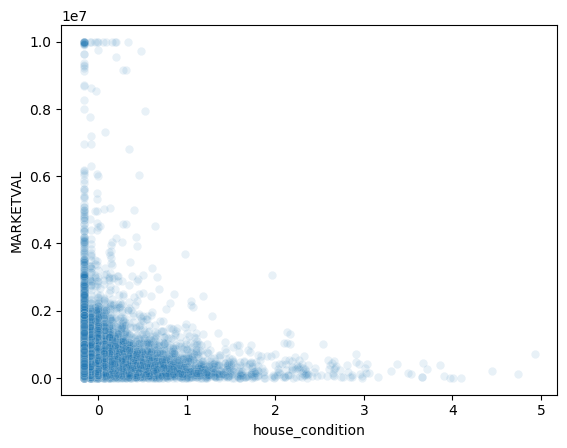

In [49]:
sns.scatterplot(x='house_condition', y='MARKETVAL', data=ahs_broken, alpha=0.1)

<Axes: xlabel='house_condition', ylabel='MARKETVAL'>

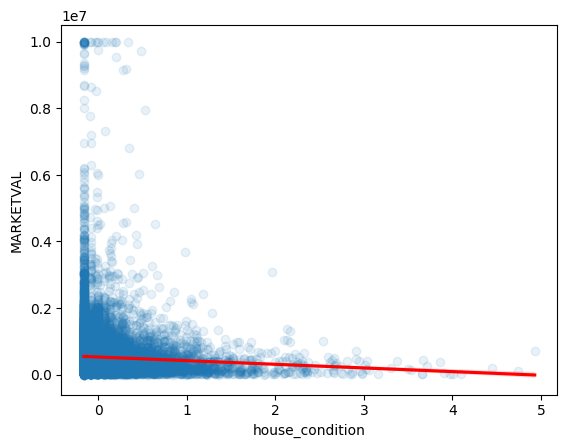

In [52]:
sns.regplot(x='house_condition', y='MARKETVAL', data=ahs_broken, scatter_kws={'alpha': 0.1}, line_kws={'color': 'red'})

### The time progression of average house price against year built

<Axes: xlabel='YRBUILT', ylabel='MARKETVAL'>

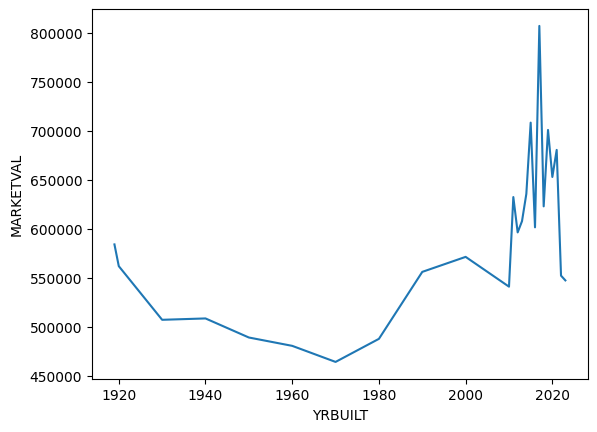

In [55]:
ahs_time = ahs_broken.groupby('YRBUILT').agg({'MARKETVAL': 'mean'}).reset_index()
sns.lineplot(x='YRBUILT', y='MARKETVAL', data=ahs_time)

### Graph matrices in which each cell contains a graph that is specific to a census division or ownership status

c:\Users\brian\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


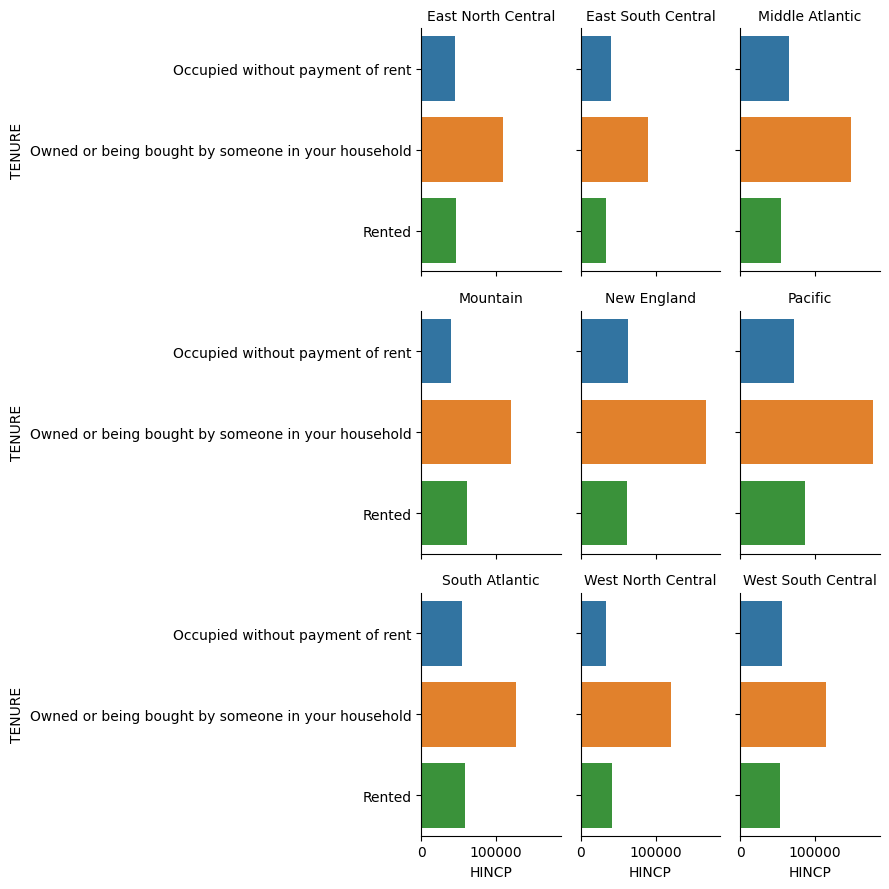

In [62]:
ahs_facet = ahs_broken.groupby(['TENURE', 'DIVISION']).agg({'HINCP': 'mean'}).reset_index()
ahs_facet

g = sns.FacetGrid(ahs_facet, col='DIVISION', hue='TENURE', col_wrap=3)
g.map(sns.barplot, 'HINCP', 'TENURE')
g.set_titles('{col_name}')

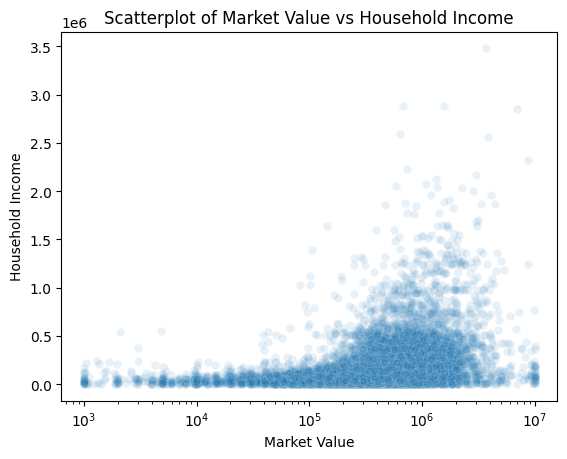

In [64]:
sns.scatterplot(x='MARKETVAL', y='HINCP', data=ahs, alpha=0.1)
plt.xlabel('Market Value')
plt.ylabel('Household Income')
plt.title('Scatterplot of Market Value vs Household Income')
plt.xscale('log')